## Importing Relevant Packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier





## Reading the data

In [3]:
NBAstats= pd.read_csv('Data Nba/NBA_Dataset.csv')
NBAstats1= NBAstats.set_index('player')
NBAstats1.fillna(0)
NBAstats2= NBAstats1.reset_index()


In [4]:
Allstar_2002= pd.read_csv('Untitled Folder/archive (9)/2002-03 NBA - Sheet1.csv')
Allstar_2003= pd.read_csv('Untitled Folder/archive (9)/2003-04 NBA - Sheet1.csv')
Allstar_2004= pd.read_csv('Untitled Folder/archive (9)/2004-05 NBA - Sheet1 (1).csv')
Allstar_2005= pd.read_csv('Untitled Folder/archive (9)/2005-06 NBA - Sheet1.csv')
Allstar_2006= pd.read_csv('Untitled Folder/archive (9)/2006-07 NBA - Sheet1.csv')
Allstar_2007= pd.read_csv('Untitled Folder/archive (9)/2007-08 NBA - Sheet1.csv')
Allstar_2008= pd.read_csv('Untitled Folder/archive (9)/2008-09 NBA - Sheet1.csv')
Allstar_2009= pd.read_csv('Untitled Folder/archive (9)/2009-10 NBA - Sheet1.csv')
Allstar_2010= pd.read_csv('Untitled Folder/archive (9)/2010-11 NBA - Sheet1.csv')
Allstar_2011= pd.read_csv('Untitled Folder/archive (9)/2010-11 NBA - Sheet1.csv')
Allstar_2012= pd.read_csv('Untitled Folder/archive (9)/2011-12 NBA - Sheet1.csv')
Allstar_2013= pd.read_csv('Untitled Folder/archive (9)/2012-13 NBA - Sheet1.csv')
Allstar_2014= pd.read_csv('Untitled Folder/archive (9)/2013-14 NBA - Sheet1.csv')
Allstar_2015= pd.read_csv('Untitled Folder/archive (9)/2014-15 NBA - Sheet1 (1).csv')
Allstar_2016= pd.read_csv('Untitled Folder/archive (9)/2015-16 NBA - Sheet1.csv')
Allstar_2017= pd.read_csv('Untitled Folder/archive (9)/2016-17 NBA - Sheet1.csv')
Allstar_2018= pd.read_csv('Untitled Folder/archive (9)/2017-18 NBA - Sheet1.csv')
Allstar_2019= pd.read_csv('Untitled Folder/archive (9)/2018-19 NBA - Sheet1 (1).csv')
Allstar_2020= pd.read_csv('Untitled Folder/archive (9)/2019-20 NBA - Sheet1.csv')
Allstar_2021= pd.read_csv('Untitled Folder/archive (9)/2020-21 NBA - Sheet1.csv')
Allstar_2022= pd.read_csv('Untitled Folder/archive (9)/2021-22 NBA - Sheet1.csv')

## Data Cleaning 

#### Addings the year each player was an allstar

In [6]:

Allstar_2002['Year'] =2002
Allstar_2003['Year'] =2003
Allstar_2004['Year']=2004
Allstar_2005['Year']=2005
Allstar_2006['Year']=2006
Allstar_2007['Year']=2007
Allstar_2008['Year']=2008
Allstar_2009['Year']=2009
Allstar_2010['Year']=2010
Allstar_2011['Year']=2011
Allstar_2012['Year']=2012
Allstar_2013['Year']=2013
Allstar_2014['Year']=2014
Allstar_2015['Year']=2015
Allstar_2016['Year']=2016
Allstar_2017['Year']=2017
Allstar_2018['Year']=2018
Allstar_2019['Year']=2019
Allstar_2020['Year']=2020
Allstar_2021['Year']=2021
Allstar_2022['Year']=2022



#### Concatinating all the All Star teams into one Dataframe

In [7]:
allstar_combined = pd.concat([
    Allstar_2002, Allstar_2003, Allstar_2004,Allstar_2005,Allstar_2006,Allstar_2007,Allstar_2008,Allstar_2009,Allstar_2010,Allstar_2011,Allstar_2012,Allstar_2013,Allstar_2014,Allstar_2015,Allstar_2016,Allstar_2017,Allstar_2018,Allstar_2019,Allstar_2020,Allstar_2021,Allstar_2022] , ignore_index=True)
def was_allstar(player, year):
    return player in allstar_combined[allstar_combined['Year'] == year]['Player'].values

allstar_combined['Was_Allstar'] = allstar_combined.apply(lambda row: was_allstar(row['Player'], row['Year']), axis=1)
columns_to_drop = ['Pos', '3P%', '2P%', 'FT%', 'Tm', '3P', '3PA', '2PA', '2P', 'eFG%', 'FT', 'FTA', 'ORB', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

allstar_combined.drop(columns=columns_to_drop, inplace=True)

#### Dropping any unncessary columns and data
##### This is their stats for their all star years, which is already present in NBASTATS dataframe 

#### Merging NBA Stats and All Star stats to make one dateframe will all the nba player stats and if they were an allstar or not. 

#### If they are an allstar the value will be true in "Was_Allstar"
#### If they were not an allstart the value wil be false in "Was_Allstar"

In [8]:
merged_df = pd.merge(NBAstats2, allstar_combined, left_on=['player', 'season'], right_on=['Player', 'Year'], how='left')
merged_df1 = merged_df.drop(columns=['Player', 'Age']) #Redundant categories 

merged_df1['Year'] = merged_df['season'].copy()# Contains the same values

merged_df1_modified = merged_df1.copy()

merged_df1_modified['Was_Allstar'] = merged_df1_modified['Was_Allstar'].fillna(False)

Finaldf= merged_df1_modified.dropna() # Creating a dataframe with the players stats and if they were an allstar, however it is still missing the raptor scores

In [9]:
RAPTOR= pd.read_csv('Untitled Folder/archive (9)/historical_RAPTOR_by_player.csv')

RAPTOR1= RAPTOR.drop(columns=['pace_impact','player_id','predator_total','predator_defense','predator_offense','poss','war_total','mp','war_playoffs','war_reg_season'])
RAPTOR1

,player_name,season,raptor_offense,raptor_defense,raptor_total
0,Alaa Abdelnaby,1991,-3.938450,-0.510076,-4.448526
1,Alaa Abdelnaby,1992,-2.553849,-0.197943,-2.751792
2,Alaa Abdelnaby,1993,-2.373736,-2.069808,-4.443544
3,Alaa Abdelnaby,1994,-6.140056,-2.748312,-8.888368
4,Alaa Abdelnaby,1995,-3.846543,-1.268012,-5.114556
...,...,...,...,...,...
19154,Ivica Zubac,2018,-2.903709,2.688832,-0.214877
19155,Ivica Zubac,2019,-2.362444,1.813768,-0.548676
19156,Ivica Zubac,2020,1.099849,3.549458,4.649308
19157,Ivica Zubac,2021,-0.909039,2.525735,1.616696


### Importing Raptor Scores
#### RAPTOR stands for “Robust Algorithm (using) Player Tracking (and) On/Off Ratings” and measures the number of points a player contributes to team offense and team defense per 100 possessions, relative to a league-average player.

In [10]:

RaptorFinal = pd.merge(Finaldf, RAPTOR1, left_on=['player', 'season'], right_on=['player_name', 'season'], how='left')
 #Creating a Final dataframe with raptor scores, nba stats, and if they were an all star, or not.
    
RaptorFinal.dropna()

RaptorFinal.to_csv('raptorfinal.csv')

In [11]:
RaptorFinal['Was_Allstar']

0        False
1        False
2        False
3        False
4        False
         ...  
14811    False
14812    False
14813     True
14814    False
14815    False
Name: Was_Allstar, Length: 14816, dtype: bool

## Visualizing Data

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_37963/2613309457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = RaptorFinal.corr()


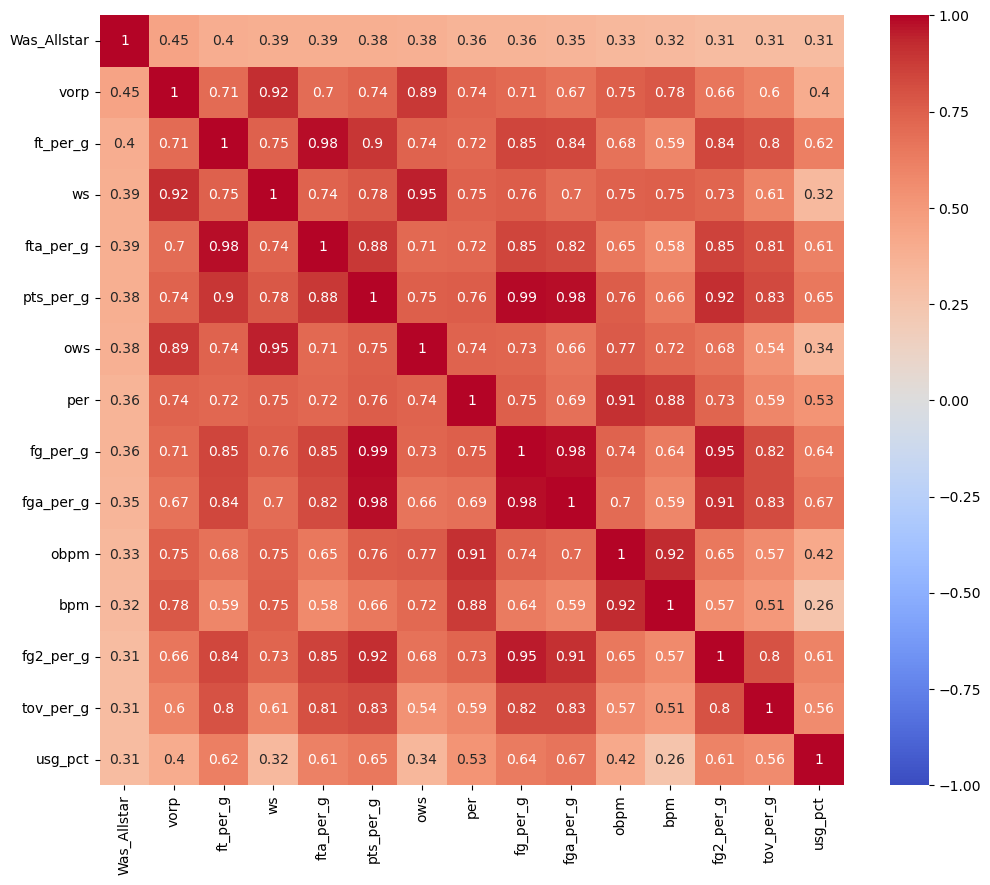

In [12]:
#Ony identifying the top 15 columns that has the greatest correlation to Was_Allstar
correlation_matrix = RaptorFinal.corr()

top_15_columns = correlation_matrix.nlargest(15, 'Was_Allstar')['Was_Allstar'].index

top_15_corr = correlation_matrix.loc[top_15_columns, top_15_columns]

plt.figure(figsize=(12, 10))  

sns.heatmap(top_15_corr,
            annot=True,
            fmt='0.2g',
            vmin=-1,
            vmax=1,
            center=0,
            cmap='coolwarm')

plt.show()


In [29]:
RaptorFinal1= RaptorFinal.dropna()

RaptorFinal1

,player,season,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,award_share,mov,mov_adj,win_loss_pct,Year,Was_Allstar,player_name,raptor_offense,raptor_defense,raptor_total
0,Kareem Abdul-Jabbar,1982,C,34,LAL,76,76,35.2,9.9,17.1,...,0.045,4.87,4.37,0.695,1982,False,Kareem Abdul-Jabbar,1.268046,1.649586,2.917632
1,Alvan Adams,1982,C,27,PHO,79,75,30.3,6.4,13.0,...,0.000,3.45,3.05,0.561,1982,False,Alvan Adams,-0.239279,3.426199,3.186920
2,Mark Aguirre,1982,SF,22,DAL,51,20,28.8,7.5,16.1,...,0.000,-4.43,-4.48,0.341,1982,False,Mark Aguirre,0.391569,-1.207204,-0.815635
3,Danny Ainge,1982,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.000,6.38,6.35,0.768,1982,False,Danny Ainge,-2.013171,0.170069,-1.843102
4,Tiny Archibald,1982,PG,33,BOS,68,51,31.9,4.5,9.6,...,0.000,6.38,6.35,0.768,1982,False,Tiny Archibald,2.053575,-1.470132,0.583442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,Gabe York,2022,SG,28,IND,2,0,10.5,1.0,3.5,...,0.000,-3.48,-3.26,0.305,2022,False,Gabe York,0.758249,2.301326,3.059575
14812,Thaddeus Young,2022,PF,33,TOT,52,1,16.3,2.7,5.2,...,0.000,0.00,0.00,0.500,2022,False,Thaddeus Young,-0.540097,0.726837,0.186740
14813,Trae Young,2022,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.000,1.56,1.55,0.524,2022,True,Trae Young,6.715589,-3.049648,3.665941
14814,Omer Yurtseven,2022,C,23,MIA,56,12,12.6,2.3,4.4,...,0.000,4.45,4.23,0.646,2022,False,Omer Yurtseven,-2.049417,0.876685,-1.172733


### Splitting data into y value and X value. Y value representing whether they player made the allstar team that year or not.

In [14]:
y = RaptorFinal1.reset_index()["Was_Allstar"]
X = RaptorFinal1.drop("Was_Allstar", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train.columns

Index(['player', 'season', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share', 'mov',
       'mov_adj', 'win_loss_pct', 'Year', 'player_name', 'raptor_offense',
       'raptor_defense', 'raptor_total'],
      dtype='object')

In [17]:
year = 2021

In [22]:
X_train.loc[X_train['season'] == year] & X_train['position'] == 'PG']['player'].unique()

array(['Kyle Anderson', 'Domantas Sabonis', 'Jeremy Lamb', 'Tyrese Maxey',
       'Markus Howard', 'Justin Holiday', 'Talen Horton-Tucker',
       'Jordan Bell', 'Terrence Ross', 'Chris Chiozza', 'Otto Porter Jr.',
       'Mike Scott', 'Michael Porter Jr.', 'Jalen McDaniels',
       'Harrison Barnes', 'Rodney McGruder', 'Darius Garland',
       'Cassius Stanley', 'Al-Farouq Aminu', 'Gabriel Deck',
       "Devonte' Graham", 'Hassan Whiteside', 'Doug McDermott',
       'Larry Nance Jr.', 'Kyle Guy', 'Kyrie Irving', 'T.J. Warren',
       'Bruce Brown', 'Desmond Bane', 'Amir Coffey', 'Bruno Fernando',
       'Sekou Doumbouya', 'Anthony Edwards', 'Gary Harris', 'Jake Layman',
       'Caris LeVert', 'Aleksej Pokusevski', 'PJ Dozier', 'Stephen Curry',
       'RJ Barrett', 'Josh Hall', 'Austin Rivers', 'John Konchar',
       'Robert Covington', 'Al Horford', 'Bam Adebayo', 'Coby White',
       'Lonnie Walker IV', 'Daniel Theis', 'Kris Dunn',
       'Tristan Thompson', 'Damian Jones', 'Steven A

In [18]:
print(y.shape) #checking shapes of y and x to make sure they match
print(X.shape)

(14124,)
(14124, 60)


In [19]:
X_test_numerical= X_test.select_dtypes(["int64", "float64"]).copy() #identifying just the numerical columns in the test set 
X_train_numerical= X_train.select_dtypes(["int64", "float64"]).copy()#identifying just the numerical columns in the train set


In [20]:
X_train_numerical.columns

Index(['season', 'age', 'g', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g',
       'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'fg2_per_g',
       'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct',
       'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
       'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp', 'per',
       'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows',
       'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share',
       'mov', 'mov_adj', 'win_loss_pct', 'Year', 'raptor_offense',
       'raptor_defense', 'raptor_total'],
      dtype='object')

### Scaling data so all the numerical columns are on the same scale

In [21]:

scaler = MinMaxScaler()

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test_numerical),
    index=X_test_numerical.index,
    columns=X_test_numerical.columns
)

print(X_test_scaled) # scaling the test data 

       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ...       bpm      vorp

In [22]:

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_numerical),
    index=X_train_numerical.index,
    columns=X_train_numerical.columns
)

print(X_train_scaled) #scaling the train set 

       season   age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
13802   0.975  0.36  0.809524  0.831325  0.605769  0.346154   0.334545   
789     0.075  0.16  0.547619  0.000000  0.163462  0.115385   0.134545   
5475    0.425  0.48  0.416667  0.108434  0.442308  0.184615   0.203636   
7490    0.575  0.20  0.952381  0.168675  0.391827  0.253846   0.290909   
4688    0.375  0.48  0.583333  0.590361  0.646635  0.230769   0.265455   
...       ...   ...       ...       ...       ...       ...        ...   
13750   0.950  0.20  0.726190  0.746988  0.658654  0.330769   0.334545   
3283    0.275  0.68  0.928571  0.493976  0.538462  0.284615   0.254545   
10175   0.750  0.72  0.595238  0.614458  0.552885  0.215385   0.221818   
11206   0.825  0.32  0.309524  0.325301  0.762019  0.676923   0.618182   
2749    0.225  0.52  0.761905  0.156627  0.391827  0.223077   0.232727   

         fg_pct  fg3_per_g  fg3a_per_g  ...       bpm      vorp  award_share  \
13802  0.608583   0.264151    0

## Creation of Pipelines, determing the best performing model

#### Pipeline 1 (Decision Tree Classifier with Min Max Scaler)

In [23]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123))]) 
#a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks

In [24]:
pipe.fit(X_train_scaled, y_train) #fitting X train and y train to test set


Pipeline(steps=[('mms', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(random_state=123))])

In [25]:
pipe.score(X_test_scaled, y_test) #checking score not nearly as high as would have liked


0.8966298499008779

#### Pipeline 2 (Decision Tree Classifier, Min Max Scaler, with GridsearchCV

In [26]:
pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('tree', DecisionTreeClassifier(random_state=123))])
grid = [{
    'tree__max_depth': [None, 2, 6, 10],
    'tree__min_samples_split': [5, 10]
}]

gridsearch = GridSearchCV(
    estimator=pipe,
    param_grid=grid,
    scoring='accuracy',
    cv=5
)

gridsearch.fit(X_train_scaled, y_train)





GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid=[{'tree__max_depth': [None, 2, 6, 10],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [27]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9853676956480695
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

#### Pipeline 3 (Decision Tree Classifier, Min Max Scaler, with GridsearchCV, and SMOTE)

In [26]:
over = SMOTE(sampling_strategy=0.1)  
under = RandomUnderSampler(sampling_strategy=0.5) 

pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('smote', over),# MinMaxScaler to scale the features
    ('tree', DecisionTreeClassifier(random_state=123))  # DecisionTreeClassifier as the model
])


grid = [{
    'tree__max_depth': [None, 2, 6, 10],
    'tree__min_samples_split': [5, 10]
}]

gridsearch = GridSearchCV(
    estimator=pipe,  
    param_grid=grid,  
    scoring='accuracy',  
    cv=5  
)

gridsearch.fit(X_train_scaled, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('smote', SMOTE(sampling_strategy=0.1)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid=[{'tree__max_depth': [None, 2, 6, 10],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [27]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9822524308505617
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

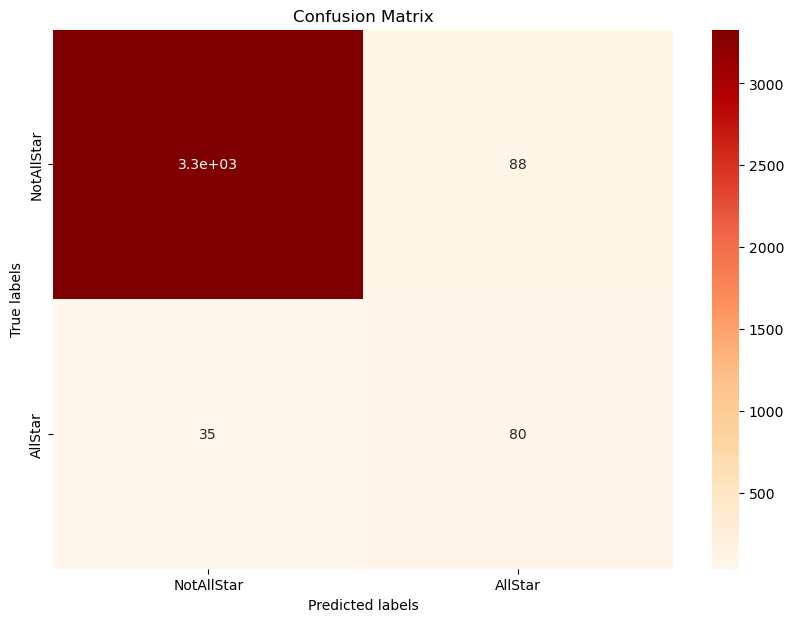

In [28]:
pred = gridsearch.best_estimator_.predict(X_test_scaled)  # Creating predictions
CF = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))  # Visualizing predictions with a confusion matrix
ax = sns.heatmap(CF, annot=True, cmap='OrRd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NotAllStar', 'AllStar'])
ax.yaxis.set_ticklabels(['NotAllStar', 'AllStar'])

plt.show()

#### Pipeline 4 (RandomForestClassifier, with SMOTE, GridSearch CV, and Min Max Scalar)

In [29]:
over = SMOTE(sampling_strategy=0.1)  
under = RandomUnderSampler(sampling_strategy=0.5) 

pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('smote', over),# MinMaxScaler to scale the features
    ('tree', RandomForestClassifier(random_state=123))  # RandomForestClassifier as the model
])


grid = [{
    'tree__max_depth': [None, 2, 6, 10],
    'tree__min_samples_split': [5, 10]
}]

gridsearch = GridSearchCV(
    estimator=pipe,  
    param_grid=grid,  
    scoring='accuracy',  
    cv=5  
)

gridsearch.fit(X_train_scaled, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('smote', SMOTE(sampling_strategy=0.1)),
                                       ('tree',
                                        RandomForestClassifier(random_state=123))]),
             param_grid=[{'tree__max_depth': [None, 2, 6, 10],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [30]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9955631077126404
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

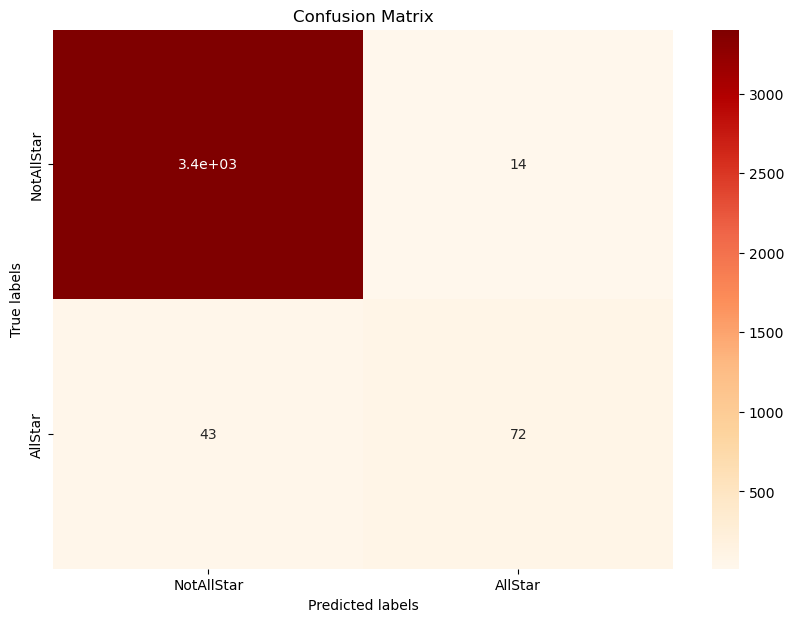

In [31]:
pred = gridsearch.best_estimator_.predict(X_test_scaled)  # Creating predictions
CF = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))  # Visualizing predictions with a confusion matrix
ax = sns.heatmap(CF, annot=True, cmap='OrRd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NotAllStar', 'AllStar'])
ax.yaxis.set_ticklabels(['NotAllStar', 'AllStar'])

plt.show()

#### Pipeline 5 (XGBClassifier, with SMOTE, GridSearch CV, and Min Max Scalar)

In [32]:

pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('tree', XGBClassifier(random_state=123))  # XGBClassifier as the model
])

PARAMETERS = {
    "tree__subsample": [0.75, 1],
    "tree__colsample_bytree": [0.75, 1],
    "tree__max_depth": [2, 6],
    "tree__min_child_weight": [1, 5],
    "tree__learning_rate": [0.1, 0.01]
}

grid = [{
    'tree__max_depth': [None, 2, 6, 10],
    'tree__min_child_weight': [5, 10]
}]

gridsearch = GridSearchCV(
    estimator=pipe,
    param_grid={**PARAMETERS, **grid[0]},  # Combine the two parameter grids
    scoring='accuracy',
    cv=5
)

gridsearch.fit(X_train_scaled, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('tree',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      i...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=123, ...))]),
             param_grid={'tree__colsample_bytree': [0.75, 1],
                         'tree__learning_rate': [0.1, 0.01],
                         'tree__max_depth': [None, 2, 6, 10],
                         'tree__min_child_weight': [5, 10],
                         'tree__subsample': [0.75, 1]},
             scoring='accuracy')

In [33]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9916926272066459
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

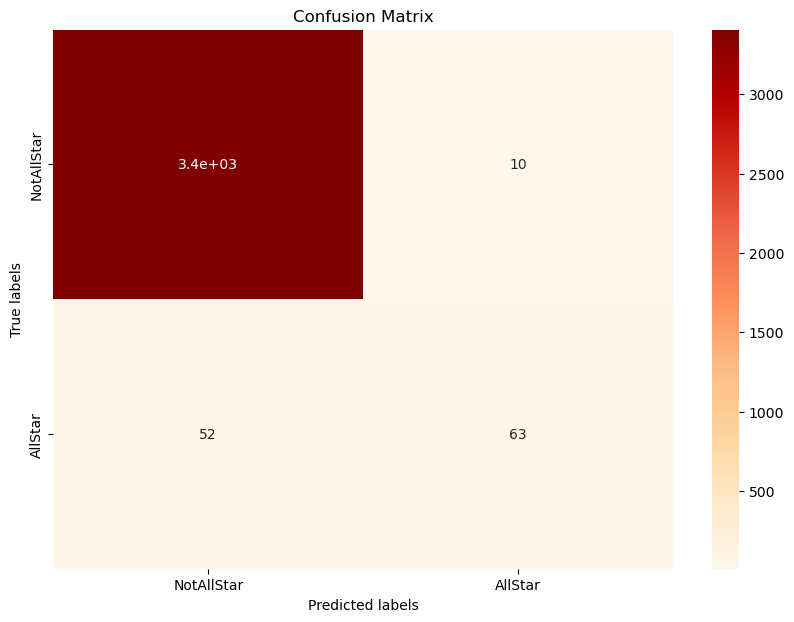

In [34]:
pred = gridsearch.best_estimator_.predict(X_test_scaled)  # Creating predictions
CF = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))  # Visualizing predictions with a confusion matrix
ax = sns.heatmap(CF, annot=True, cmap='OrRd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NotAllStar', 'AllStar'])
ax.yaxis.set_ticklabels(['NotAllStar', 'AllStar'])

plt.show()

#### Pipeline 6 (ExtraTreesClassifier, with SMOTE, GridSearch CV, and Min Max Scalar)

In [35]:
over = SMOTE(sampling_strategy=0.1)  
under = RandomUnderSampler(sampling_strategy=0.5) 

pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('smote', over),# MinMaxScaler to scale the features
    ('tree', ExtraTreesClassifier(random_state=123))  # ExtraTreeClassifier as the model
])


grid = [{
    'tree__max_depth': [None, 2, 6, 10],
    'tree__min_samples_split': [5, 10]
}]

gridsearch = GridSearchCV(
    estimator=pipe,  
    param_grid=grid,  
    scoring='accuracy',  
    cv=5  
)

gridsearch.fit(X_train_scaled, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('smote', SMOTE(sampling_strategy=0.1)),
                                       ('tree',
                                        ExtraTreesClassifier(random_state=123))]),
             param_grid=[{'tree__max_depth': [None, 2, 6, 10],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [36]:

print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9914094213159633
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

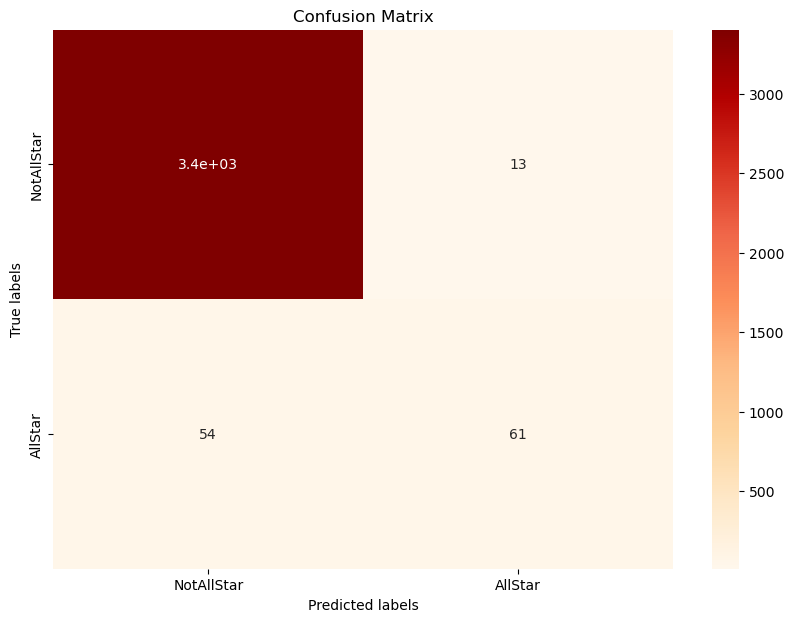

In [37]:
pred = gridsearch.best_estimator_.predict(X_test_scaled)  # Creating predictions
CF = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))  # Visualizing predictions with a confusion matrix
ax = sns.heatmap(CF, annot=True, cmap='OrRd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NotAllStar', 'AllStar'])
ax.yaxis.set_ticklabels(['NotAllStar', 'AllStar'])

plt.show()

#### Pipeline 7 (SVC, with SMOTE, GridSearch CV, and Min Max Scalar)

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('smote', over),
    ('svc', SVC(random_state=123))  
])

grid = [{
    'svc__C': [0.1, 1, 10],  
    'svc__kernel': ['linear', 'rbf'],  
    'svc__gamma': ['scale', 'auto'],  
}]

gridsearch = GridSearchCV(
    estimator=pipe,
    param_grid=grid,
    scoring='accuracy',
    cv=5
)

gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('smote', SMOTE(sampling_strategy=0.1)),
                                       ('svc', SVC(random_state=123))]),
             param_grid=[{'svc__C': [0.1, 1, 10],
                          'svc__gamma': ['scale', 'auto'],
                          'svc__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [40]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9797979797979798
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

In [70]:
print(gridsearch.score(X_train_scaled, y_train))
print(X_test_scaled,y_test)

0.9796091758708582
       season       age         g        gs  mp_per_g  fg_per_g  fga_per_g  \
10917   0.800  0.545455  0.807229  0.817073  0.759124  0.552239   0.501832   
2481    0.225  0.363636  0.650602  0.097561  0.362530  0.179104   0.164835   
6277    0.500  0.318182  0.963855  0.658537  0.649635  0.313433   0.347985   
6080    0.475  0.227273  0.783133  0.817073  0.880779  0.626866   0.681319   
33      0.000  0.227273  0.566265  0.000000  0.119221  0.089552   0.084249   
...       ...       ...       ...       ...       ...       ...        ...   
4811    0.375  0.181818  0.795181  0.073171  0.233577  0.134328   0.109890   
1621    0.150  0.409091  0.783133  0.085366  0.416058  0.365672   0.395604   
9363    0.700  0.545455  0.843373  0.878049  0.751825  0.365672   0.391941   
3279    0.275  0.454545  0.060241  0.000000  0.094891  0.029851   0.051282   
1020    0.075  0.318182  0.530120  0.097561  0.209246  0.097015   0.098901   

         fg_pct  fg3_per_g  fg3a_per_g  ... 

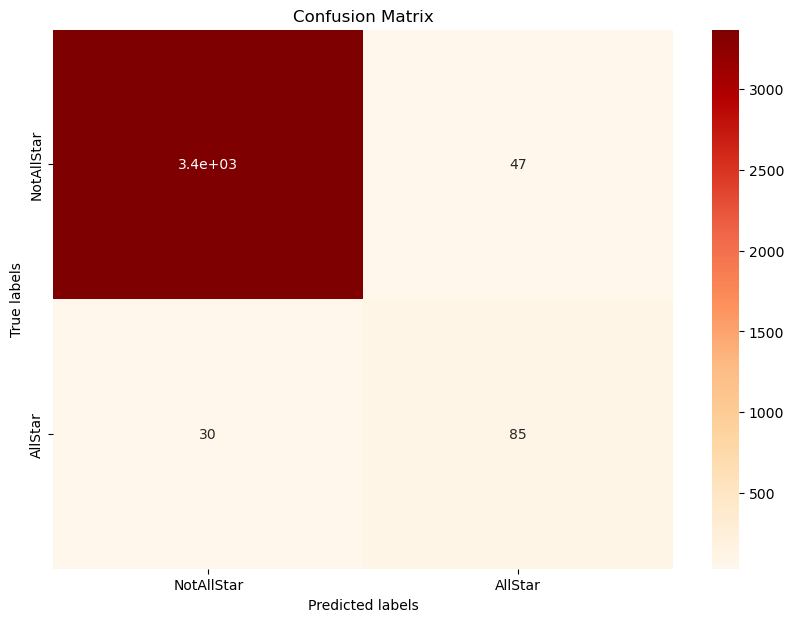

In [41]:
pred = gridsearch.best_estimator_.predict(X_test_scaled)  # Creating predictions
CF = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))  # Visualizing predictions with a confusion matrix
ax = sns.heatmap(CF, annot=True, cmap='OrRd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NotAllStar', 'AllStar'])
ax.yaxis.set_ticklabels(['NotAllStar', 'AllStar'])

plt.show()

In [43]:
import pickle


with open('gridsearch.pkl', 'wb') as file:
    pickle.dump(gridsearch, file)

## Conclusion


The Support Vector Classifier (SVC) with SMOTE and MinMaxScaler is the best model for predicting NBA All-Star selections. It effectively separates classes, handles non-linear data, and deals with class imbalance. The model achieved high accuracy and is reliable for identifying potential All-Star players based on historical NBA statistics and team selection data. Further fine-tuning and exploration of advanced algorithms may improve results in the future.d be evaluated on new data to ensure its robustness and generalizability.

In conclusion, the Support Vector Classifier with SMOTE and MinMaxScaler is recommended for predicting NBA All-Star selections. It provides a reliable and efficient solution to identify potential All-Star players based on their historical NBA statistics and team selection data. Nevertheless, further fine-tuning and exploration of other advanced algorithms may yield even better results in the future.